<a href="https://colab.research.google.com/github/nssn96/ML_iris/blob/main/ML_iris_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignmet 1 - Iris dataset


*   Name : Surya Narayanan Nadhamuni Suresh
*   UTA ID : 1001877873




In [307]:
#import statements
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [308]:
#loading the iris dataset
iris_dataset=load_iris()
print(type(iris_dataset))

<class 'sklearn.utils.Bunch'>


In [309]:
#to explore the iris_dataset dictionary and understand the different available keys and thier values
print(iris_dataset.keys())
#print(iris_dataset.data)
print(iris_dataset.target)
print(iris_dataset.frame)
print(iris_dataset.target_names)
print(iris_dataset.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
None
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


From the above code snippet we can see that we have 

*   Four input features, which are sepal length, sepal width, petal length, petal width.
*   Three target names depending on the input features. The target names are : setosa=0, versicolor=1,virginica=2



In [310]:
#storing features and target of iris dataset separately
x = pd.DataFrame(iris_dataset.data)  # x is in matrix format
y=pd.DataFrame(iris_dataset.target)   # y is in a vector format
x.columns=['sepal_length','sepal_width','petal_length','petal_width']
y.columns=['target']

In [311]:
#to check the number/size of the data matrix
print(x.shape)

(150, 4)


So, from above code we can see that we have a total of 150 samples of input features

In [312]:
#converting to dataframe
data = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],columns= iris_dataset['feature_names'] + ['target'])
data['species'] = pd.Categorical.from_codes(iris_dataset.target,iris_dataset.target_names)
data.columns=['sepal_length','sepal_width','petal_length','petal_width','target','species']
data

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0,virginica
146,6.3,2.5,5.0,1.9,2.0,virginica
147,6.5,3.0,5.2,2.0,2.0,virginica
148,6.2,3.4,5.4,2.3,2.0,virginica


In [313]:

# plt.scatter(data.sepal_length,data.sepal_width)
# plt.xlabel("Sepal length")
# plt.ylabel("Sepal Width")
# plt.show()


In [314]:
#splitting the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1, random_state=1,stratify = y)

In [315]:
# x1=x_train.petal_length
# y1 = x_train.petal_width
# num_obs = len(x1)
# noise = np.random.normal(loc=0.0, scale=5.0, size=num_obs)
# y= 10+(2*x1)+noise

# plt.figure(figsize=(20,7))
# plt.plot(x1, y, 'o')


In [316]:
#global variable to store all the weights at the end of 100 iterations of all the model , so that can be used for testing
w_all=[]

# Training

In [317]:
#class definition for Linear regression
class LinearRegression:

  global w_all

  def fit(self,data,target,l2_reg=0,steps=100,bsize=32):
    self.alpha=0.01 #learning rate
    self.m = data.shape #num of training examples,features
    self.data = np.stack((np.ones(len(data)),data),axis=1)
    #print(self.data)
    self.target=target
    self.bias=0
    self.w = np.random.uniform(-1,1,size=(2,))
    self.loss_arr=[]
    

    for i in range(steps):
      #target_pred = self.predict(self.data)
      mse_loss=0.0
      #splitting the dataset according to the batch size
      for j in range(bsize):
        value = np.random.randint(0,len(data))
        #print("value is "+str(value))
        data_new = data[value:value+1]
        data_new = np.stack((np.ones(len(data_new)),data_new),axis=1)
        target_new = target[value:value+1]

        #print(data_new)
        #dw = -(2 * (data_new.T).dot(target_new-self.predict(data_new))) / self.m
        dw = -(2 * (data_new.T).dot(target_new-self.predict(data_new)) +(2 * l2_reg * self.w)  ) / self.m
        self.w -= (self.alpha * dw)
        mse_loss += (np.sum((target_new-self.predict(data_new)) ** 2)) / self.m
      self.loss_arr.append(mse_loss/bsize)


    # for i in range(steps):
    #   target_pred = self.predict(self.data)


    #   # calculate gradient descent
    #   dbias = -2 * np.sum(self.target-target_pred) / self.m
    #   dw = -(2 * (self.data.T).dot(self.target-target_pred)) / self.m

    #   #least square function
    #   mse_loss =  (np.sum((self.target-target_pred) ** 2)) / self.m
    #   #mse_loss = np.square(np.subtract(self.target,target_pred)).mean()
    #   #mse_loss = mean_squared_error(self.target,target_pred)
    #   self.loss_arr.append(mse_loss)

    #   #update weights
    #   self.bias-= (self.alpha * dbias)
    #   self.w -= (self.alpha * dw)

    w_all.append(self.w)
    return self.loss_arr

  def predict(self,data):
    #return data.dot(self.w) + self.bias
    return data @ self.w


In [318]:
# # 12 diff combinations of models
# model = LinearRegression()
# print(len(x1))
# l  = model.fit(x1,y1)
# print(l)
# # step_num = range(1,101)
# # plt.plot(step_num, l, label='loss vs step')

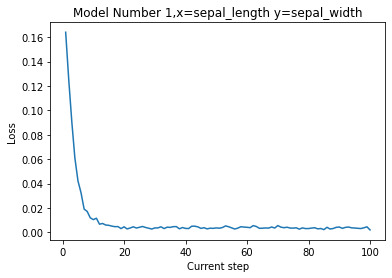

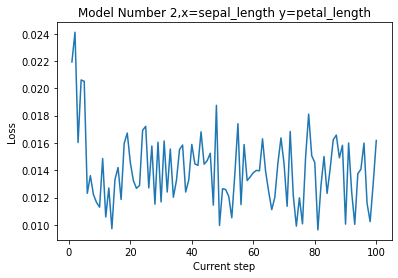

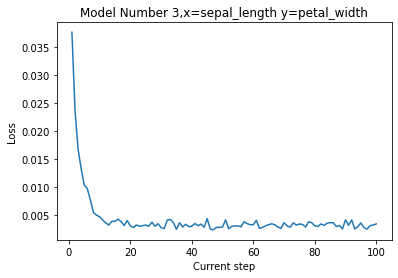

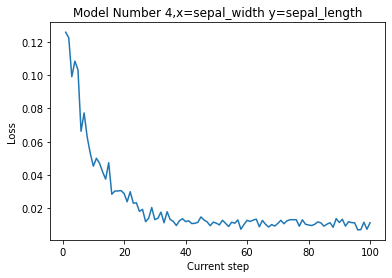

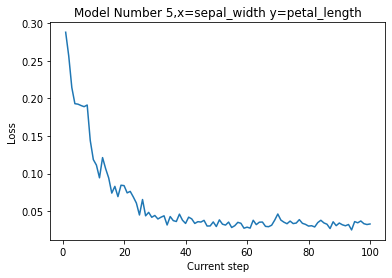

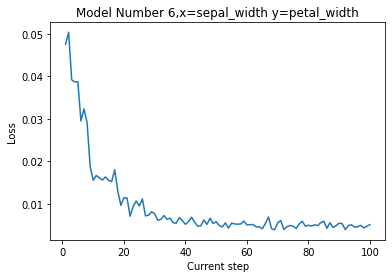

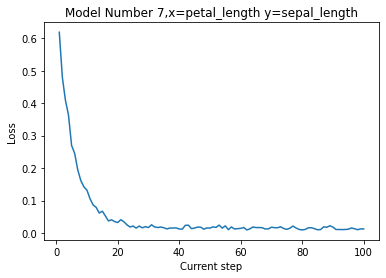

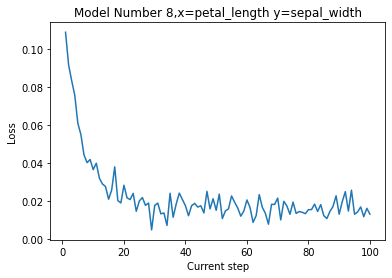

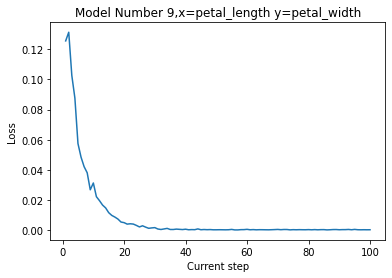

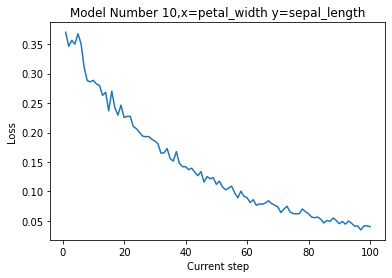

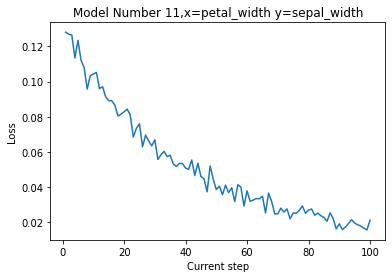

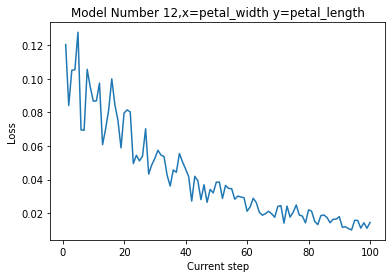

In [319]:
# 12 diff combinations of models
model = LinearRegression()
step_num = range(1,101)
temp = ['sepal_length','sepal_width','petal_length','petal_width']
li = list(itertools.permutations(temp,2))
cnt=1
model_num=1
for i in li:
  feature1=i[0]
  feature2=i[1]
  input = x_train[feature1]
  output = x_train[feature2]
  l  = model.fit(input,output)
  plt.figure()
  plt.title('Model Number '+str(model_num)+',x='+feature1+' y='+feature2)
  plt.ylabel('Loss')
  plt.xlabel('Current step')
  plt.plot(step_num, l)
  model_num+=1
  #print(l)

plt.show()


# L2 Regularization

For this part, I will be choosing the weights of Model 3, where x= sepal_length and we will be predicting y = petal_width

In [320]:
w_m3 = w_all[2]
print(w_m3)
print(len(w_all))

[0.36952253 0.15008734]
12


In [321]:
#The code for L2 regularization
model_l2 = LinearRegression()
#for L2 regularization we just need to give the l2 penality value as 1, which I have passed in the parameter for the fit function
l  = model_l2.fit(x_train['sepal_length'],x_train['petal_width'],1)
print(l)

[array([0.00993321]), array([0.01059203]), array([0.0073282]), array([0.00666618]), array([0.00508119]), array([0.00526213]), array([0.00284992]), array([0.00435071]), array([0.00373653]), array([0.00358663]), array([0.0031065]), array([0.00341152]), array([0.00379916]), array([0.0035657]), array([0.00398732]), array([0.00247511]), array([0.00344354]), array([0.00357061]), array([0.0049833]), array([0.00353069]), array([0.00307953]), array([0.00346302]), array([0.00519434]), array([0.00359915]), array([0.00365964]), array([0.00352645]), array([0.00277822]), array([0.0033155]), array([0.00357104]), array([0.00383588]), array([0.00312951]), array([0.00317124]), array([0.00358183]), array([0.00282257]), array([0.00365542]), array([0.0029062]), array([0.00331195]), array([0.00261112]), array([0.0034487]), array([0.00442255]), array([0.00293067]), array([0.00380718]), array([0.00421136]), array([0.00318047]), array([0.00307802]), array([0.00295403]), array([0.00291236]), array([0.00223257])

In [322]:
#the last element in the global weights list is the weights of the model with L2 Regularization
print(len(w_all))
print('The weightts of the model without L2 Regularization'+str(w_all[0]))
print('The weights for the model with L2 Regularization'+str(w_all[-1]))

13
The weightts of the model without L2 Regularization[-0.57818989  0.59832767]
The weights for the model with L2 Regularization[0.72623831 0.09836707]


# Testing

In [323]:
#the code to test the 12 models that we built before
cnt=0
#calculate loss
for i in li:
  feat1 = i[0]
  feat2 = i[1]
  data= x_test[feat1]
  target= x_test[feat2]
  data = np.stack((np.ones(len(data)),data),axis=1)
  w_test = w_all[cnt]
  cnt+=1
  y_pred = data @ w_test
  err = mean_squared_error(y_pred,target)
  print('Model '+str(cnt)+' Error : '+str(err))




Model 1 Error : 0.36113957214603576
Model 2 Error : 1.6143445713378446
Model 3 Error : 0.472284897641168
Model 4 Error : 0.8306038980054757
Model 5 Error : 3.247708453221291
Model 6 Error : 0.6647968778355547
Model 7 Error : 1.646620275739
Model 8 Error : 1.7658477510088768
Model 9 Error : 0.05104496811924482
Model 10 Error : 4.278746069503462
Model 11 Error : 1.8826628481148142
Model 12 Error : 0.8336400069541284


In [324]:


# # fitting the model with data set

# # reg_sgd = SGDRegressor(loss='squared_error', max_iter=100)
# # reg_sgd.fit(X,y)
# # y_hat_pred = reg_sgd.predict(X_test)
# backup = data



# MSE_score_train = []
# MSE_score_test = []

# mod_no = range(1,13)
# for i in mod_no:
#   model = SGDRegressor(loss="squared_error", max_iter=100)
#   model.fit(x_train, y_train)
#   y_train_hat  = model.predict(x_train)
#   y_test_hat  = model.predict(x_test)
#   MSE_score_train.append(-1 * mean_squared_error(y_train,y_train_hat))
#   MSE_score_test.append(-1 * mean_squared_error(y_test,y_test_hat))
    
# plt.plot(mod_no,  MSE_score_train, label='train')
# plt.plot(mod_no,  MSE_score_test, label='test')
# plt.xlabel("Model Number")
# plt.ylabel("MSE")
# plt.legend()

# # plt.annotate('Sweet Spot', xy = (9, -.005), xytext=(9, -.015),
# #             arrowprops = dict(facecolor='black', shrink = 0.05));